# Introduction to Pandas with ArticleMeta

*Note*:
This notebook had been written during the presentation,
but some text (like this) have afterwards been included
to help on understanding its contents.

The ArtileMeta API is public,
we can get a JSON with some information about the collections:

<http://articlemeta.scielo.org/api/v1/collection/identifiers/>

Instead of a raw JSON we can see from opening that address in a web browser,
can we load/analyze this with Python?
Can we plot some information from it?

Yes! And that's the goal of this notebook.

## Loading a table-like JSON from ArticleMeta with Pandas

Let's import Pandas as `pd` following its convention,
and load that JSON directly with `pd.read_json`.

*Note*: Data collected on 2018-09-24.

In [1]:
import pandas as pd

In [2]:
url = "http://articlemeta.scielo.org/api/v1/collection/identifiers/"
dataset = pd.read_json(url)

In [3]:
dataset

,acron,acron2,code,document_count,domain,has_analytics,is_active,journal_count,name,original_name,status,type
0,arg,ar,arg,37438.0,www.scielo.org.ar,True,True,"{'current': 120, 'deceased': 23}","{'es': 'Argentina', 'pt': 'Argentina', 'en': '...",Argentina,certified,journals
1,chl,cl,chl,61760.0,www.scielo.cl,True,True,"{'current': 103, 'deceased': 13, 'suspended': 1}","{'es': 'Chile', 'pt': 'Chile', 'en': 'Chile'}",Chile,certified,journals
2,col,co,col,66973.0,www.scielo.org.co,True,True,"{'current': 224, 'suspended': 4}","{'es': 'Colombia', 'pt': 'Colombia', 'en': 'Co...",Colombia,certified,journals
3,cub,cu,cub,33492.0,scielo.sld.cu,True,True,"{'current': 61, 'deceased': 2, 'suspended': 4}","{'es': 'Cuba', 'pt': 'Cuba', 'en': 'Cuba'}",Cuba,certified,journals
4,esp,es,esp,37223.0,scielo.isciii.es,True,True,"{'current': 43, 'deceased': 6, 'suspended': 11}","{'es': 'España', 'pt': 'Espanha', 'en': 'Spain'}",España,certified,journals
5,mex,mx,mex,61167.0,www.scielo.org.mx,True,True,"{'current': 156, 'deceased': 12, 'suspended': 47}","{'es': 'Mexico', 'pt': 'Mexico', 'en': 'Mexico'}",Mexico,certified,journals
6,prt,pt,prt,17237.0,www.scielo.mec.pt,True,True,"{'current': 47, 'deceased': 5, 'suspended': 17}","{'es': 'Portugal', 'pt': 'Portugal', 'en': 'Po...",Portugal,certified,journals
7,NaN,NaN,NaN,NaN,books.scielo.org,False,True,NaN,"{'es': 'SciELO Libros', 'pt': 'SciELO Livros',...",NaN,NaN,books
8,scl,br,scl,370296.0,www.scielo.br,True,True,"{'current': 291, 'deceased': 40, 'suspended': 35}","{'es': 'Brasil', 'pt': 'Brasil', 'en': 'Brazil'}",Brasil,certified,journals
9,spa,sp,spa,40996.0,www.scielosp.org,True,True,"{'current': 18, 'suspended': 2}","{'es': 'Salud Publica', 'pt': 'Saúde Pública',...",Saúde Pública,certified,journals


Horizontal scrolling doesn't help, but all information is there.
That's a *DataFrame*, one of the two main Pandas data structures.
The other is a *Series*, which one can think of
as a column from some dataframe.

The first column we can see is the index,
which isn't part of the JSON returned by the ArticleMeta API.
The remaining columns have the downloaded data.
The `journal_count` and `name` columns are nested in the downloaded JSON,
so they're dictionaries in the resulting dataframe.

In [4]:
type(dataset)

pandas.core.frame.DataFrame

In [5]:
type(dataset["has_analytics"])

pandas.core.series.Series

## How many collections are in SciELO Analytics?

[SciELO Analytics](https://analytics.scielo.org/)
have reports for several collections,
but not for all of them.
The `has_analytics` column tells us if a collection have such a report,
and the `Network` report only have the data
from collections where `has_analytics` is `True`.

In [6]:
dataset["has_analytics"]

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7     False
8      True
9      True
10     True
11     True
12     True
13    False
14     True
15     True
16     True
17    False
18     True
19     True
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28     True
29     True
30    False
31    False
32     True
33     True
Name: has_analytics, dtype: bool

Filtering a single column, we get a *Series* instance,
which has some specific methods like `value_counts`.

Most collections are in SciELO Analytics!

In [7]:
dataset["has_analytics"].value_counts()

True     21
False    13
Name: has_analytics, dtype: int64

## Why does/doesn't a collection have reports in SciELO Analytics?

Most collections have analytics,
but can we find that same information from other columns?
Actually, that's about manually building/interpreting a classifier.

### Active/discontinued collections

The first column we may check is the `is_active`.
A discontinued collection should have `is_active` equals to `False`,
and most collections are active:

In [8]:
dataset["is_active"].value_counts()

True     31
False     3
Name: is_active, dtype: int64

The discontinued entries
(it's a *selection*,
 filtering the entries that have `is_active` equal to `False`):

In [9]:
dataset[~dataset["is_active"]].T

,10,17,20
acron,sss,pro,wid
acron2,ss,pro,wi
code,sss,pro,wid
document_count,665,NaN,NaN
domain,socialsciences.scielo.org,www.proceedings.scielo.br,caribbean.scielo.org
has_analytics,True,False,False
is_active,False,False,False
journal_count,{'current': 33},{},{}
name,"{'es': 'Social Sciences', 'pt': 'Social Scienc...","{'es': 'Proceedings', 'pt': 'Proceedings', 'en...","{'es': 'West Indians', 'pt': 'West Indians', '..."
original_name,Social Sciences,Proceedings,West Indians


The Social Sciences collection (`sss`) has analytics and isn't active,
while the other two discontinued collections don't have analytics.
That's an important information,
but we can't use this information alone to segregate the entries
by the `has_analytics` column.

### Collection status

There are $4$ possible collection *status*.
Let's count the number of collections in each of them.

In [10]:
dataset["status"].value_counts()

certified      16
diffusion       8
independent     7
development     2
Name: status, dtype: int64

It's worth mentioning that
independent collections aren't managed by SciELO,
but they comply to the SciELO model.

Can we use this information to classify the entries?

In [11]:
dataset.groupby(["has_analytics", "status"]).size()

has_analytics  status     
False          diffusion       8
               independent     4
True           certified      16
               development     2
               independent     3
dtype: int64

Almost!

- The *diffusion* collections never have analytics
- The *certified* and *development* collections always have analytics
- Only $3$ *independent* collections (out of $7$) have analytics

We just need to split the collections.

In [12]:
dataset.groupby(["status", "has_analytics"]).size()

status       has_analytics
certified    True             16
development  True              2
diffusion    False             8
independent  False             4
             True              3
dtype: int64

*Technical note*:
There's no `value_counts` method for `pd.DataFrame`,
we should use the `size` method of a `groupby` result instead.
It'll create a series with multiple indices.
The indices order is the order of the first groupby parameter,
and we can make them columns by using the `reset_index` method.

In [13]:
dataset.groupby(["status", "has_analytics"]).size().reset_index()

,status,has_analytics,0
0,certified,True,16
1,development,True,2
2,diffusion,False,8
3,independent,False,4
4,independent,True,3


A cleaner approach to the same,
renaming the `pd.Series` column:

In [14]:
status_has_analytics = \
    dataset.groupby(["status", "has_analytics"]) \
           .size() \
           .rename("count") \
           .reset_index()
status_has_analytics

,status,has_analytics,count
0,certified,True,16
1,development,True,2
2,diffusion,False,8
3,independent,False,4
4,independent,True,3


We can save that table as a CSV
to load it afterwards with `pd.read_csv`:

In [15]:
status_has_analytics.to_csv("articlemeta_pandas.csv",
                            index=False)

### Selection and projection

Roughly speaking, *selection* means *filtering rows by some criteria*,
whereas *projection* means *choosing certain columns*.
We've already seen a selection while trying to understand the `is_active`.
Now let's perform a simple projection.
The available columns are:

In [16]:
dataset.columns

Index(['acron', 'acron2', 'code', 'document_count', 'domain', 'has_analytics',
       'is_active', 'journal_count', 'name', 'original_name', 'status',
       'type'],
      dtype='object')

We'll sort by the number of documents (as of 2018-09-24)
before getting the projection.
The double square brackets means that the indexing with square brackets
require a single argument: a list of column names.

In [17]:
dataset.sort_values(by="document_count") \
    [["code", "domain", "document_count", "status", "has_analytics"]]

,code,domain,document_count,status,has_analytics
32,ecu,www.scielo.ec,15.0,development,True
33,rvt,www.revtur.org,136.0,independent,True
10,sss,socialsciences.scielo.org,665.0,certified,True
22,cic,cienciaecultura.bvs.br,1784.0,diffusion,False
19,ury,www.scielo.edu.uy,4360.0,certified,True
14,bol,www.scielo.org.bo,4758.0,certified,True
15,cri,www.scielo.sa.cr,9158.0,certified,True
16,per,www.scielo.org.pe,9618.0,certified,True
6,prt,www.scielo.mec.pt,17237.0,certified,True
12,ven,www.scielo.org.ve,18971.0,certified,True


Almost all rows with an invalid document count
(`NaN`, which stands for *Not a Number*) doesn't have analytics,
while almost all rows with a valid document count number
have analytics.
The only exceptions are:

- `cic`, a diffusion collection (it doesn't have analytics)
- `pry`, a development collection (it has analytics)

Which can be classified using the `status` column alone.
Therefore we've found our classifier.
Analytics are available for
**all certified and development collections,
  as well as non-empty independent collections**.

## Plotting

We'll use the Pandas integration with Matplotlib to plot.
To display the plots in a notebook like this, we need:

In [18]:
%matplotlib inline

All `pd.Series` and `pd.DataFrame` instances have a `plot` object
with methods for plotting, like `barh` for horizontal bars:

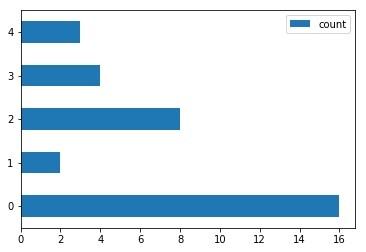

In [19]:
status_has_analytics.plot.barh()

There are two issues with that plot:

- The `<matplotlib.axes._... at 0x...>` line,
  which can be removed with a trailing `;` in the cell;
- The lack of meaningful labels for the bars.

Since the labels are just the index,
we can just set the index in the order we want:

In [20]:
status_has_analytics_indexed = \
    status_has_analytics.set_index(["status", "has_analytics"])
status_has_analytics_indexed

count
status      has_analytics       
certified   True              16
development True               2
diffusion   False              8
independent False              4
            True               3

And plot it again:

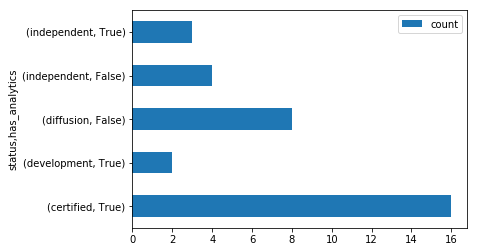

In [21]:
status_has_analytics_indexed.plot.barh();

### Seaborn

Seaborn is a library for plotting data stored in Pandas dataframes.
Like `pd` for Pandas, it has a name convention on importing.

In [22]:
import seaborn as sns

Let's create a bar plot like the one above,
grouping by both indices
(mainly `status`, but using a distinct color/`hue`
 when it does/doesn't have analytics).

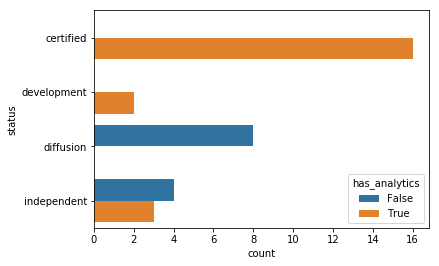

In [23]:
sns.barplot(data=status_has_analytics,
            x="count", y="status", hue="has_analytics");

A summary to create the above plot from scratch:

```python
import pandas as pd
import seaborn as sns
%matplotlib notebook

url = "http://articlemeta.scielo.org/api/v1/collection/identifiers/"
dataset = pd.read_json(url)

status_has_analytics = \
    dataset.groupby(["status", "has_analytics"]) \
           .size() \
           .rename("count") \
           .reset_index()
sns.barplot(data=status_has_analytics,
            x="count", y="status", hue="has_analytics");
```